# Explore additional metadata info

Provides code for loading in additional metadata files. You can use this as a starting point to explore, analyze, visualize other measurements in the dataset. 

Check out the files for additional information about the column values.

### Setup drive

Run the following cell to mount your Drive onto Colab. Go to the given URL and once you login and copy and paste the authorization code, you should see "drive" pop up in the files tab on the left.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Click the little triangle next to "drive" and navigate to the "AI4All Chest X-Ray Project" folder. Hover over the folder and click the 3 dots that appear on the right. Select "copy path" and replace `PASTE PATH HERE` with the path to your folder.

In [ ]:
cd "/content/drive/My Drive/AI4All Chest X-Ray Project"

/content/drive/.shortcut-targets-by-id/1iJKbtzLay6C-5OfpVHhbe1nQeNGyhFWO/AI4All Chest X-Ray Project


In [ ]:
# cd "/content/drive/My Drive/UCSF AI4ALL 2020/AI4All Project/AI4All Chest X-Ray Project"

In [ ]:
cd "/content/drive/My Drive/AI4All Project/AI4All Chest X-Ray Project"

[Errno 2] No such file or directory: '/content/drive/My Drive/AI4All Project/AI4All Chest X-Ray Project'
/content


### Import necessary libraries

In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Setup paths

In [ ]:
# setup paths
path_to_dataset = os.path.join('data')
path_to_docs = os.path.join('docs')


### Load metadata

In [ ]:
# load training data metadata
metadata = pd.read_csv(os.path.join(path_to_dataset, 'metadata_train.csv'))

# load additional metadata
cohen_nofind = pd.read_csv(os.path.join(path_to_docs, 'metadata_cohen_nofind.csv'))
cohen_covid = pd.read_csv(os.path.join(path_to_docs, 'metadata_cohen_covid.csv'))

cohen_metadata = pd.concat([cohen_covid, cohen_nofind])

cohen_severity = pd.read_csv(os.path.join(path_to_docs, 'cohen_severity_scores.csv'), skiprows=5)
stanford_metadata = pd.read_csv(os.path.join(path_to_docs, 'metadata_stanford_nofind.csv'))

In [ ]:
cohen_metadata

,patientid,offset,sex,age,finding,survival,intubated,intubation_present,went_icu,in_icu,needed_supplemental_O2,extubated,temperature,pO2_saturation,leukocyte_count,neutrophil_count,lymphocyte_count,view,modality,date,location,folder,filename,doi,url,license,clinical_notes,other_notes,Unnamed: 28
0,2,0.0,M,65.0,COVID-19,Y,N,N,N,N,Y,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 22, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
1,2,3.0,M,65.0,COVID-19,Y,N,N,N,N,Y,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 25, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
2,2,5.0,M,65.0,COVID-19,Y,N,N,N,N,Y,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 27, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
3,2,6.0,M,65.0,COVID-19,Y,N,N,N,N,Y,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 28, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
4,4,0.0,F,52.0,COVID-19,NaN,N,N,N,N,N,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 25, 2020","Changhua Christian Hospital, Changhua City, Ta...",images,nejmc2001573_f1a.jpeg,10.1056/NEJMc2001573,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,diffuse infiltrates in the bilateral lower lungs,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,316,7.0,M,54.0,No Finding,Y,Y,N,Y,NaN,NaN,Y,NaN,95.0,NaN,NaN,NaN,AP Supine,X-ray,2020,"Tehran, Iran",images,1-s2.0-S2213716520301168-gr1_lrg-c.png,10.1016/j.jgar.2020.04.024,https://www.sciencedirect.com/science/article/...,CC BY-NC-ND 4.0,A 54-year old man presented to the emergency d...,NaN,NaN
10,318,1.0,M,45.0,No Finding,NaN,Y,N,Y,NaN,Y,Y,38.5,79.0,NaN,NaN,NaN,AP Supine,X-ray,2020,"Tokyo, Japan",images,1-s2.0-S1341321X20301124-gr3_lrg-a.png,10.1016/j.jiac.2020.03.018,https://www.sciencedirect.com/science/article/...,CC BY-NC-ND 4.0,"On his arrival, he was taken directly to an is...",chest-X-ray of the patient before intubation.,Since January 2020 Elsevier has created a COVI...
11,318,2.0,M,45.0,No Finding,NaN,Y,Y,Y,Y,Y,Y,NaN,NaN,NaN,NaN,NaN,AP Supine,X-ray,2020,"Tokyo, Japan",images,1-s2.0-S1341321X20301124-gr3_lrg-b.png,10.1016/j.jiac.2020.03.018,https://www.sciencedirect.com/science/article/...,CC BY-NC-ND 4.0,Initial and serial laboratory results are show...,12 hours after initiating VV-ECMO.,Since January 2020 Elsevier has created a COVI...
12,325,NaN,F,78.0,No Finding,Y,N,N,N,N,N,NaN,36.1,NaN,NaN,NaN,NaN,AP,X-ray,12 March 2020,"Rome, Italy",images,1-s2.0-S1059131120301151-gr2-e.png,10.1016/j.seizure.2020.04.009,https://www.sciencedirect.com/science/article/...,NaN,On 12th March 2020 a 78-year-old woman was adm...,NaN,NaN


In [ ]:
stanford_metadata

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
0,CheXpert-v1.0-small/train/patient28986/study1/...,Female,69,Frontal,PA,1.0,NaN,0.0,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1,CheXpert-v1.0-small/train/patient13496/study1/...,Male,29,Frontal,PA,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
2,CheXpert-v1.0-small/train/patient00099/study1/...,Male,25,Frontal,PA,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
3,CheXpert-v1.0-small/train/patient46802/study1/...,Female,51,Frontal,AP,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0
4,CheXpert-v1.0-small/train/patient28552/study1/...,Female,43,Frontal,PA,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419,CheXpert-v1.0-small/train/patient36016/study1/...,Male,51,Frontal,AP,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0
420,CheXpert-v1.0-small/train/patient34551/study1/...,Male,77,Frontal,AP,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0
421,CheXpert-v1.0-small/train/patient20075/study1/...,Male,22,Frontal,PA,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
422,CheXpert-v1.0-small/train/patient36195/study12...,Female,49,Frontal,AP,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0


In [ ]:
cohen_severity

,filename,geographic_mean,opacity_mean
0,01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg,6.0,4.0
1,03BF7561-A9BA-4C3C-B8A0-D3E585F73F3C.jpeg,2.7,2.0
2,1-s2.0-S0140673620303706-fx1_lrg.jpg,2.0,2.0
3,1-s2.0-S1684118220300608-main.pdf-001.jpg,3.7,3.0
4,1-s2.0-S1684118220300608-main.pdf-002.jpg,1.7,1.7
...,...,...,...
89,ryct.2020200028.fig1a.jpeg,2.0,1.7
90,ryct.2020200034.fig2.jpeg,1.3,1.3
91,ryct.2020200034.fig5-day0.jpeg,3.7,3.3
92,ryct.2020200034.fig5-day4.jpeg,5.7,4.0


### Explore data!

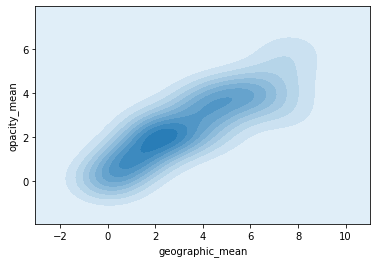

In [ ]:
sns.kdeplot(cohen_severity['geographic_mean'], cohen_severity['opacity_mean'], shade=True)

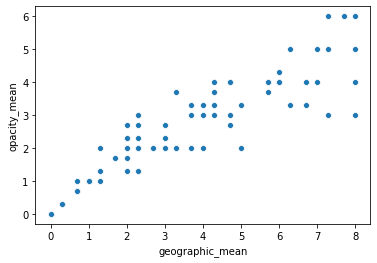

In [ ]:
sns.scatterplot(x='geographic_mean', y='opacity_mean', data=cohen_severity)

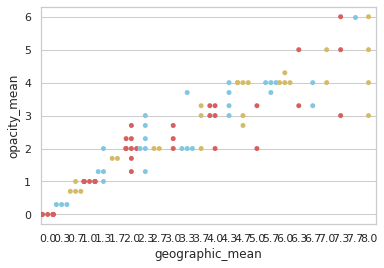

In [ ]:
# sns.set(style="whitegrid", palette="muted")

# # Load the example iris dataset
# iris = sns.load_dataset("iris")

# # "Melt" the dataset to "long-form" or "tidy" representation
# iris = pd.melt(iris, "species", var_name="measurement")

# # Draw a categorical scatterplot to show each observation
sns.swarmplot(x="geographic_mean", y="opacity_mean",
              palette=["r", "c", "y"], data=cohen_severity)